In [1]:
# Imports
import torch
import os, os.path
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf


torch.cuda.is_available()
torch.cuda.device_count()
torch.cuda.current_device()
torch.cuda.device(0)
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 4070'

In [2]:
# Facts about the dataset
data_dir = 'C:\GenshinVoice\Data'
data_class = []
for name in os.listdir(data_dir):
    data_class.append(name)

print( 'number of classes: ', len([name for name in os.listdir(data_dir)]))
print('class names: ', data_class)

for i in data_class:
    print( 'number of sample in ', i, ': ', len([name for name in os.listdir(data_dir + '\\' + i)]))


number of classes:  7
class names:  ['albedo', 'kazuha', 'nahida', 'paimon', 'venti', 'yaeMiko', 'zhongli']
number of sample in  albedo :  1071
number of sample in  kazuha :  1001
number of sample in  nahida :  1236
number of sample in  paimon :  13427
number of sample in  venti :  1025
number of sample in  yaeMiko :  998
number of sample in  zhongli :  1024


(128, 98)


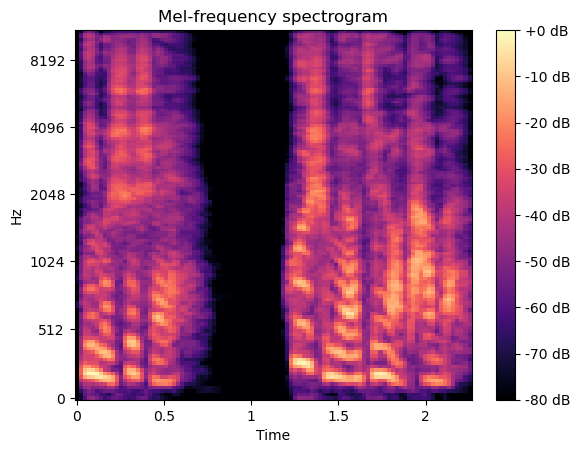

In [3]:
# Example File
filename = 'C:\\GenshinVoice\\Data\\albedo\\vo_ABDLQ002_4_albedo_01.wav'
y, sr = y, sr = librosa.load(filename)
librosa.feature.melspectrogram(y=y, sr=sr)
S = librosa.feature.melspectrogram(y=y, sr=sr)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
print(S_dB.shape)

(128, 147)


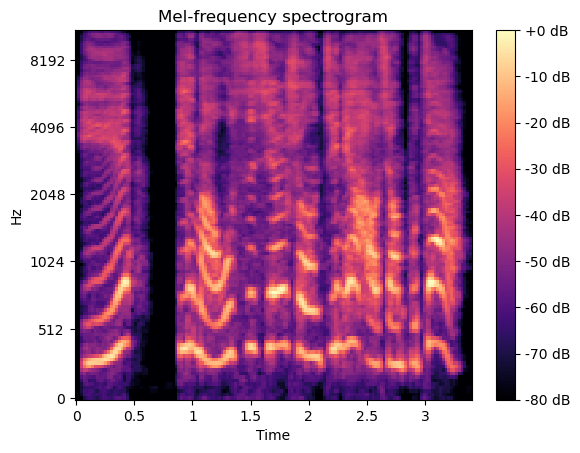

In [4]:
# Example File #2
filename = 'C:\\GenshinVoice\\Data\\paimon\\vo_ABDLQ001_1_paimon_01.wav'
y, sr = librosa.load(filename)
librosa.feature.melspectrogram(y=y, sr=sr)
S = librosa.feature.melspectrogram(y=y, sr=sr)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
print(S_dB.shape)

In [5]:
#Try to reconstruct audio from mel-spectrogram
a = librosa.feature.inverse.mel_to_audio(S, sr = sr)
out_file_name = 'C:\\Users\\Joshua Ning\\Desktop\\VChanger\\test.wav'
sf.write(out_file_name, a, sr)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

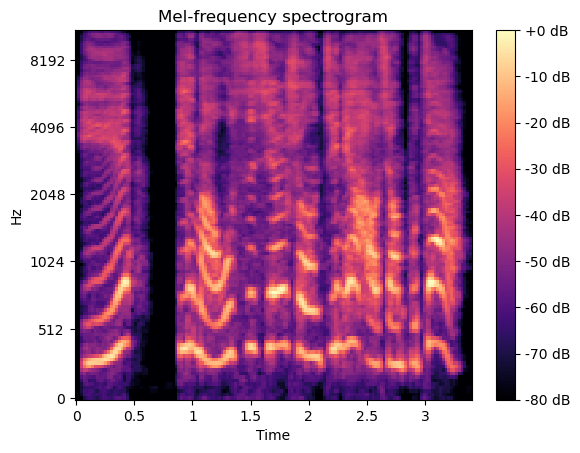

In [6]:
#mel-spectrogram from reconstructed audio
yr, srr = librosa.load(out_file_name)
librosa.feature.melspectrogram(y=y, sr=sr)
S = librosa.feature.melspectrogram(y=y, sr=sr)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [7]:
#Ground truth vs reconstructed audio
#Can't get to 0 error due to frequency binning in specturalgram
print(y)
print(yr)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.3992111e-07
 -6.7847549e-07  8.6849343e-07]
[ 0.00012207 -0.00018311 -0.00018311 ...  0.00021362  0.00024414
  0.00033569]
